## Cracking the *Black-Box*
---
### Problem Statement

You are provided with a "black-box" function, $f(\sigma)$, which takes as input a single parameter, $\sigma$, representing the volatility of the underlying asset, and outputs the price of a European call option. The exact implementation of $f(\sigma)$ is *completely* unknown. 

Additionally, you have access to Bloomberg, which provides the market price of the European call option, denoted as $C_{\text{observed}}$. 

#### Task
Determine the input volatility, $\sigma^*$, such that the following equation is satisfied:

$$
f(\sigma^*) = C_{\text{observed}}.
$$

Additionally, code a Python function that would allow you to compute $\sigma^*$, and test it with a well-chosen example for $f(\sigma)$ to validate the implementation.

---

### Solution

To solve this problem, we need to make certain assumptions about the nature of the function $f(\sigma)$ and its relationship to $\sigma$. 

#### Assumptions
1. The function $f(\sigma)$ is **monotonic**, specifically **strictly increasing**. This reflects the intuition that as the volatility of the underlying asset increases, the price of the call option also increases.
2. By the **Intermediate Value Theorem (IVT)**, the strict monotonicity ensures the existence of a unique solution $\sigma^*$ in any interval $\left[a, b\right]$ where:
   $$
   f(a) \leq C_{\text{observed}} \leq f(b).
   $$
3. The value $C_{\text{observed}}$ lies within a realistic range of option prices, so the interval $\left[a, b\right]$ can be chosen to encompass it. Typical choices might be $a = 0$ (low volatility) and $b = 1$ (very high volatility, 100%).

With these assumptions, we can use the **bisection method**, a numerical technique, to find the unique $\sigma^*$.

---

### Steps of the Bisection Method

1. **Initialization**:
   - Choose an interval $\left[a, b\right]$ such that:
     $$
     f(a) \leq C_{\text{observed}} \leq f(b).
     $$
   - If this condition is not met, adjust $a$ and $b$ to encompass $C_{\text{observed}}$.

2. **Iterative Procedure**:
   - Compute the midpoint of the interval:
     $$
     m = \frac{a + b}{2}.
     $$
   - Evaluate $f(m)$:
     - If $f(m) < C_{\text{observed}}$, update $a = m$.
     - If $f(m) > C_{\text{observed}}$, update $b = m$.
   - Repeat until the interval length $\left|b - a\right|$ is less than a predefined tolerance.

3. **Convergence**:
   - Once $\left|b - a\right| < \text{tolerance}$, the midpoint $m$ is taken as the approximation of $\sigma^*$.

---

### Python Implementation

In [1]:
def find_sigma(f, C_observed, sigma_min=0, sigma_max=1, tolerance=1e-6):
    """
    Finds the input volatility sigma* such that f(sigma*) = C_observed using the bisection method.

    Parameters:
        f (function): The black-box function returning the price of a call option for a given sigma.
        C_observed (float): The observed market price of the call option.
        sigma_min (float): The minimum value of sigma (default: 0).
        sigma_max (float): The maximum value of sigma (default: 1).
        tolerance (float): The precision for stopping the search (default: 1e-6).

    Returns:
        float: The implied volatility sigma*.
    """
    a, b = sigma_min, sigma_max

    # Check if the observed price is within the interval range
    if f(a) > C_observed or f(b) < C_observed:
        raise ValueError("C_observed is not within the range of f(sigma_min) and f(sigma_max).")

    # Bisection loop
    while b - a > tolerance:
        m = (a + b) / 2
        price_m = f(m)

        if price_m < C_observed:
            # If f((a+b)/2) < C, then a = (a+b)/2, b = b
            a = m
        else:
            # If f((a+b)/2) > C, then a = a, b = (a+b)/2
            b = m

    return (a + b) / 2

---
### Tests

In [8]:
import matplotlib.pyplot as plt
import numpy as np

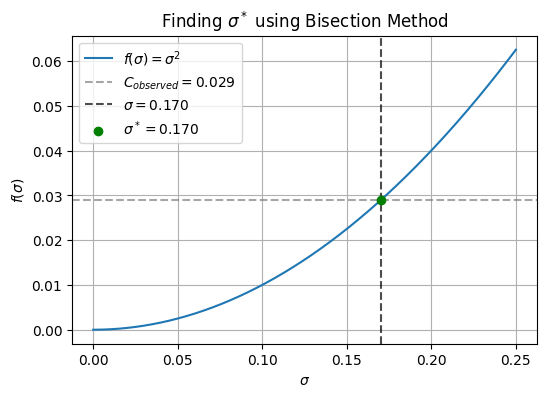

True sigma: 0.17, Recovered sigma: 0.170000


In [42]:
def f(sigma):
    """
    Function to test the bisection method.
    We choose f(x) = x^2 as it is monotonic and strictly increasing on R+.
    """
    return sigma**2

# Actual sigma value for testing
sigma = 0.17
C_observed = f(sigma)

# Use the bisection method to find sigma
sigma_star = find_sigma(f, C_observed)

# Visualize the function and the result
x = np.linspace(0, 0.25, 2000)  # Generate x values for plotting
y = x**2  # Compute y values for plotting

plt.figure(figsize=(6, 4))
plt.plot(x, y, label=fr"$f(\sigma) = \sigma^2$")
plt.axhline(y=C_observed, color='grey', alpha = 0.7, linestyle='--', label=fr"$C_{{observed}} = {C_observed:.3f}$")
plt.axvline(x=sigma, color='k', alpha = 0.7, linestyle='--', label=fr"$\sigma = {sigma:.3f}$")
plt.scatter(sigma_star, C_observed, color='g', zorder=5, label=fr"$\sigma^* = {sigma_star:.3f}$")
plt.xlabel(fr"$\sigma$")
plt.ylabel(fr"$f(\sigma)$")
plt.title(fr"Finding $\sigma^*$ using Bisection Method")
plt.legend()
plt.grid(True)
plt.show()

print(f"True sigma: {sigma}, Recovered sigma: {sigma_star:5f}")
